## Defining the problem

- Predict and classify teen phone addiction level.
- Target variable: Addiction_Level
- Data Visualisations using matplotlib
- Classification → categorical target
- Regression → numerical target

## Import required libraries

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

These are commonly used together in EDA:

- pandas → Load, clean, and process data.

- numpy → Perform calculations on numerical data.

- matplotlib → Create visualizations (histograms, bar charts, scatter plots, etc.).

# Import dataset

In [416]:
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


- pd.read_csv: Loads the CSV file into a pandas DataFrame called df.
- df.head(): Shows the first 5 rows of the dataset for a quick preview.
- Dataset is a csv file related to addiction level in teenagers.

# Display basic information of dataset

In [420]:
df.shape

(3000, 25)

- The dataset has 3000 rows and 25 columns.

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

- df.info() shows a summary of the DataFrame, including:

    - Total rows and columns

    - Column names

    - Data types (int, float, object, etc.)

    - Non-null counts (how many values are not missing in each column)

    - Memory usage

In [426]:
df.nunique()

ID                        3000
Name                      2933
Age                          7
Gender                       3
Location                  2726
School_Grade                 6
Daily_Usage_Hours          107
Sleep_Hours                 71
Academic_Performance        51
Social_Interactions         11
Exercise_Hours              39
Anxiety_Level               10
Depression_Level            10
Self_Esteem                 10
Parental_Control             2
Screen_Time_Before_Bed      27
Phone_Checks_Per_Day       131
Apps_Used_Daily             16
Time_on_Social_Media        51
Time_on_Gaming              41
Time_on_Education           31
Phone_Usage_Purpose          5
Family_Communication        10
Weekend_Usage_Hours        120
Addiction_Level             80
dtype: int64

- df.nunique() returns the number of unique values in each column of the DataFrame.
  
- This helps identify:

    - Categorical columns (few unique values, like Gender = 2)

    - Continuous columns (many unique values, like ID = 500).

In [429]:
df.describe()

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


- df.describe() gives statistical summary of all numerical columns in the DataFrame:

    - count → number of non-null values
    
    - mean → average value
    
    - std → standard deviation
    
    - min → smallest value
    
    - 25%, 50% (median), 75% → percentiles
    
    - max → largest value

In [432]:
missing = df.isnull().any().sum()
missing

0

- df.isnull() → Returns True for missing values, False otherwise.

- .any() → Checks each column; True if that column has any missing value.

- .sum() → Counts how many columns have missing values.

- missing will show the number of columns that contain at least one missing value.

In [435]:
duplicate = df.duplicated().sum()
duplicate

0

- df.duplicated() → Returns True for each row that is a duplicate of a previous row.

- .sum() → Counts how many such duplicate rows exist.

# Drop irrelevant columns

In [439]:
drop_c = ['ID', 'Name', 'Location']
df.drop(columns = drop_c, inplace = True, errors = "ignore")
df

,Age,Gender,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,13,Female,9th,4.0,6.1,78,5,0.1,10,3,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,17,Female,7th,5.5,6.5,70,5,0.0,3,7,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,13,Other,11th,5.8,5.5,93,8,0.8,2,3,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,18,Female,12th,3.1,3.9,78,8,1.6,9,10,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,14,Other,9th,2.5,6.7,56,4,1.1,1,5,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16,Female,12th,3.9,6.4,53,4,0.9,7,10,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,13,Female,8th,3.6,7.3,93,5,0.0,8,8,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,14,Other,7th,3.2,6.5,98,1,0.0,4,3,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,17,Female,9th,6.7,7.5,67,3,0.2,3,5,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


- drop_c → List of columns to remove.

- df.drop(columns=drop_c, inplace=True) → Deletes those columns from df directly.

- errors="ignore" → Prevents errors if any column in drop_c doesn’t exist.

- df → Displays the updated DataFrame without those columns.

In [442]:
for each in df.columns:
    print("Column: ", each)
    print(df[each].nunique())
    print("-" * 80)

Column:  Age
7
--------------------------------------------------------------------------------
Column:  Gender
3
--------------------------------------------------------------------------------
Column:  School_Grade
6
--------------------------------------------------------------------------------
Column:  Daily_Usage_Hours
107
--------------------------------------------------------------------------------
Column:  Sleep_Hours
71
--------------------------------------------------------------------------------
Column:  Academic_Performance
51
--------------------------------------------------------------------------------
Column:  Social_Interactions
11
--------------------------------------------------------------------------------
Column:  Exercise_Hours
39
--------------------------------------------------------------------------------
Column:  Anxiety_Level
10
--------------------------------------------------------------------------------
Column:  Depression_Level
10
------------

- for each in df.columns: → Loops through all column names.

- df[each].nunique() → Counts unique values in that column.

- Prints the column name, its unique value count, and a separator line (- * 80).

# Data Visualisation

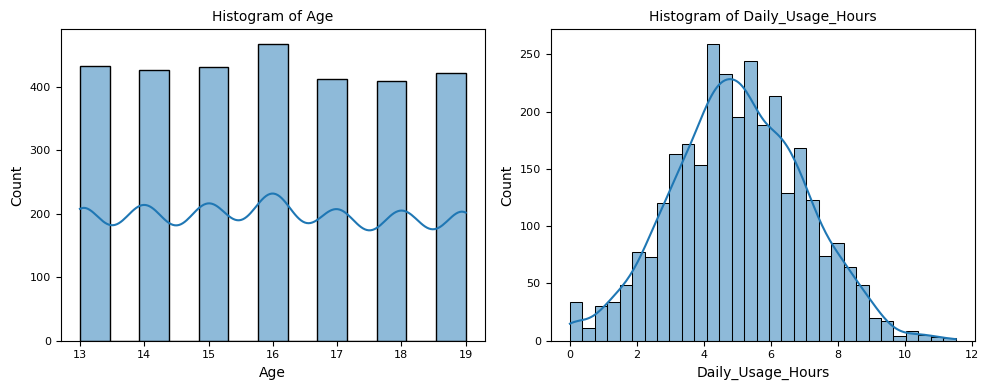

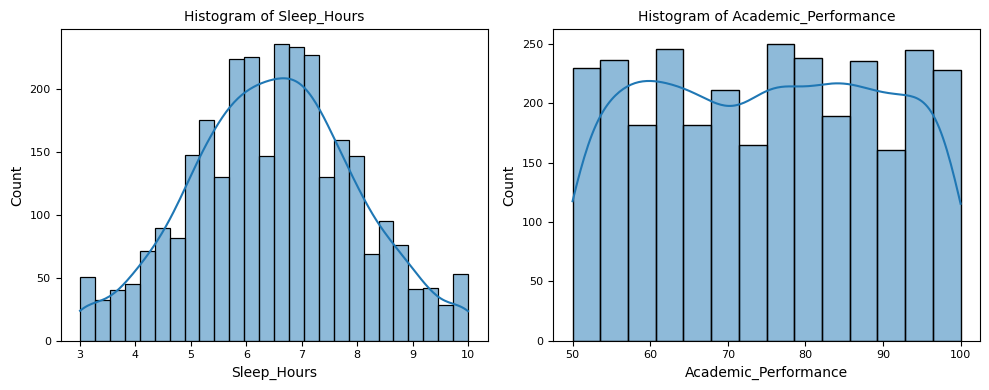

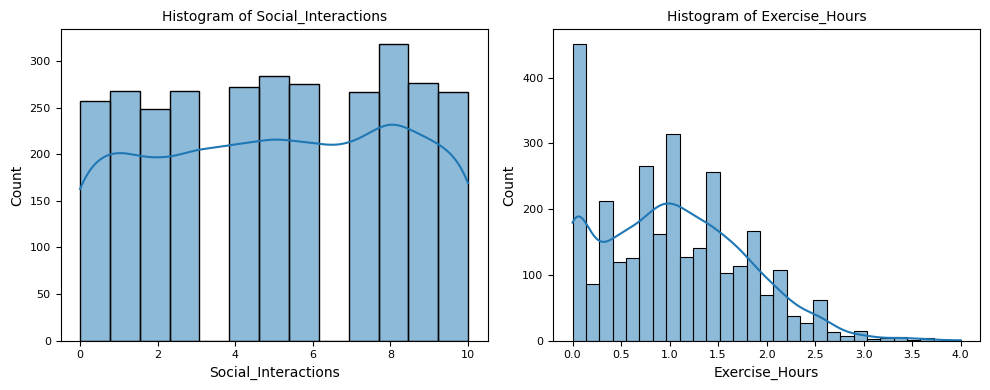

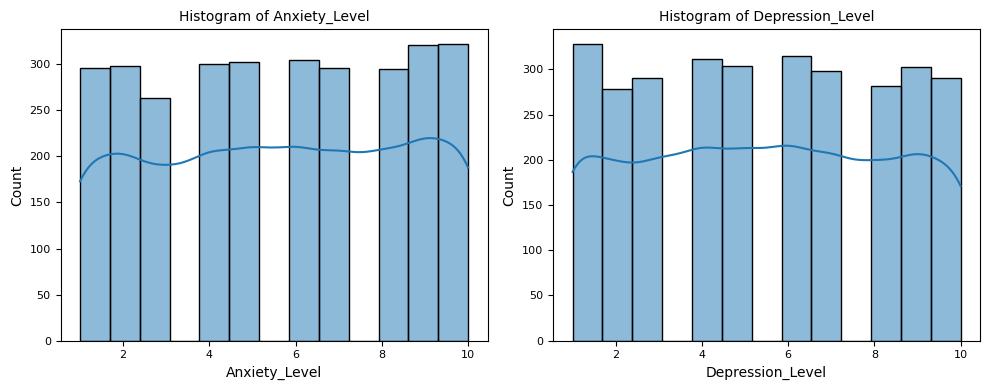

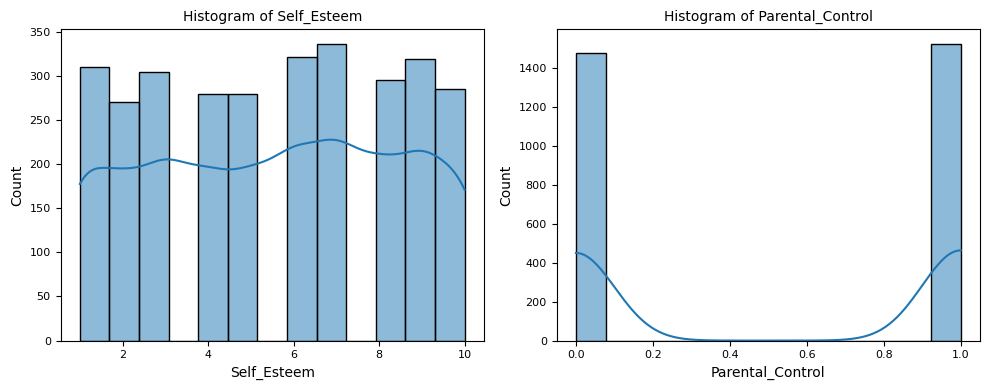

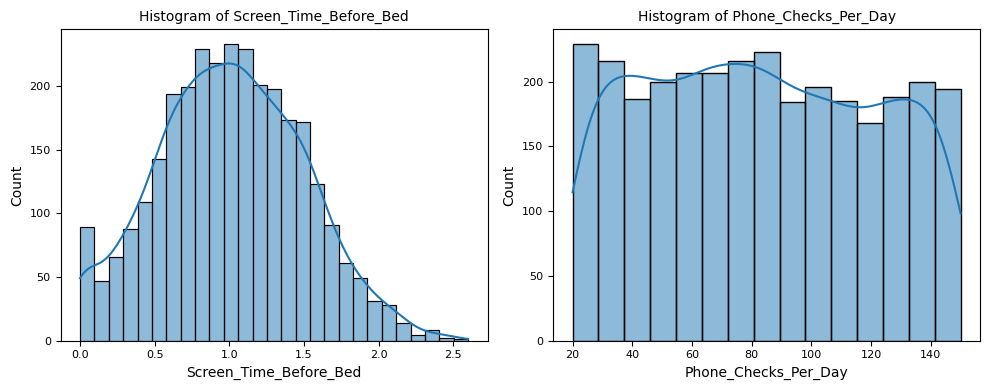

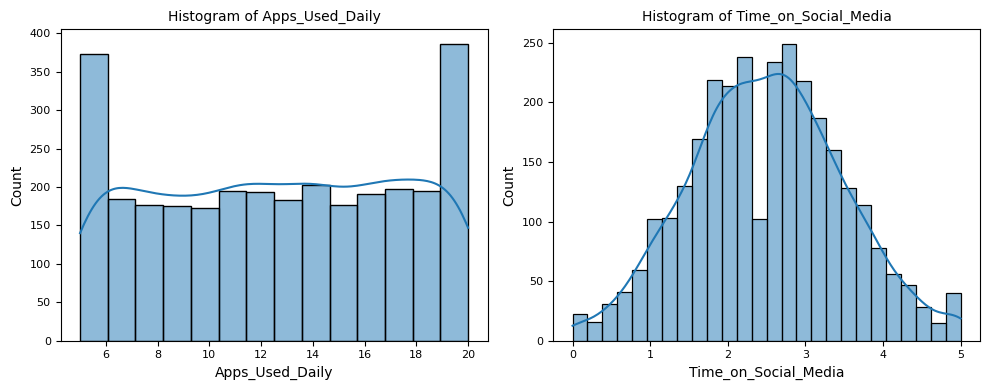

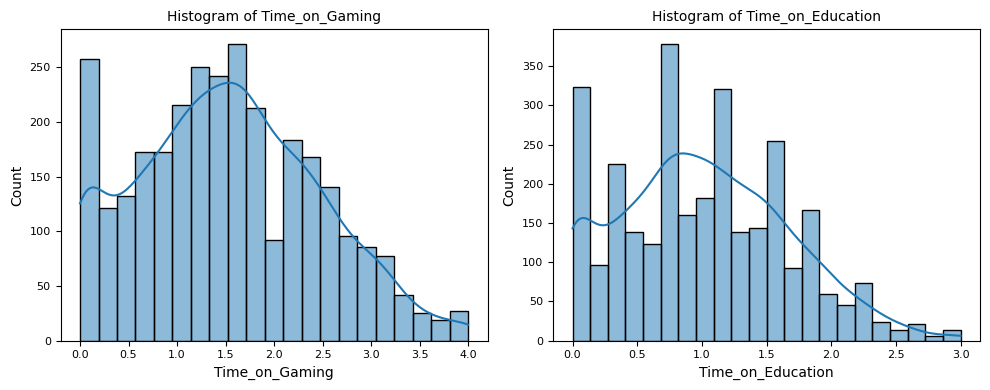

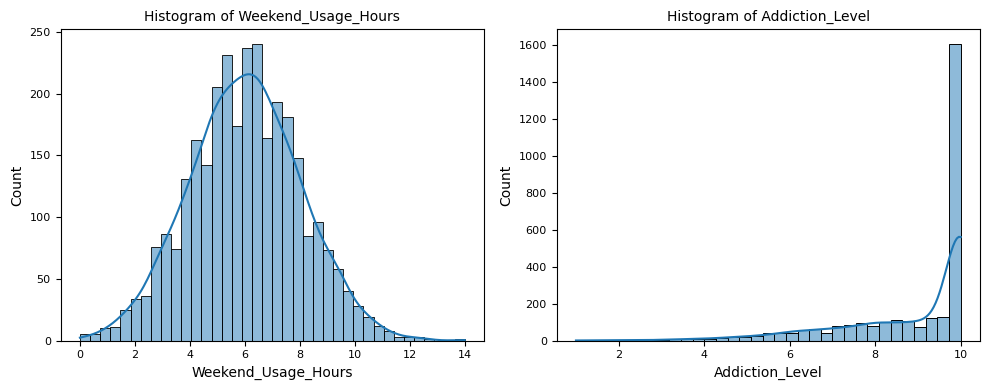

In [446]:
import seaborn as sns

numerical_cols = ['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
                  'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 
                  'Depression_Level', 'Self_Esteem', 'Parental_Control',
                  'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
                  'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 
                  'Weekend_Usage_Hours', 'Addiction_Level']

# Plot in pairs
for i in range(0, len(numerical_cols), 2):
    cols_pair = numerical_cols[i:i+2]
    fig, axes = plt.subplots(1, len(cols_pair), figsize=(10, 4))
    
    if len(cols_pair) == 1:  # If last batch has only 1 column
        axes = [axes]
    
    for ax, col in zip(axes, cols_pair):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f'Histogram of {col}', fontsize=10)
        ax.tick_params(axis='both', labelsize=8)
    
    plt.tight_layout()
    plt.show()

- Imports Seaborn, a library for beautiful statistical visualizations.

- numerical_cols = [...], List of numerical columns in the dataset to visualize.

- Looping in pairs (for i in range(0, len(numerical_cols), 2):), Takes two columns at a time for plotting side by side.

- fig, axes = plt.subplots(1, len(cols_pair), figsize=(10, 4)), Creates one row of plots (1) with len(cols_pair) columns (either 1 or 2).

- sns.histplot(..., kde=True) → Histogram + smooth density curve, Sets title and adjusts tick sizes.

- plt.tight_layout(); plt.show(), Ensures proper spacing and displays the figure.

- Shows distribution of each numerical feature,

- Helps detect skewness, outliers, and patterns in data.

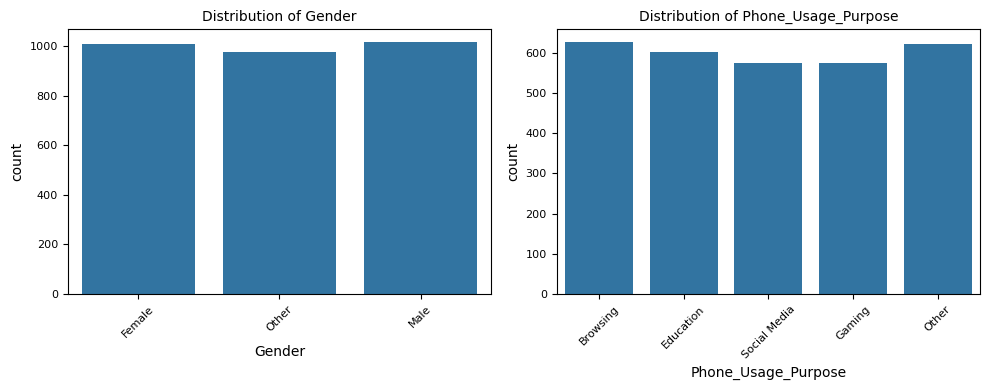

In [448]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Gender', 'Phone_Usage_Purpose']

# Plot in pairs
for i in range(0, len(categorical_cols), 2):
    cols_pair = categorical_cols[i:i+2]
    fig, axes = plt.subplots(1, len(cols_pair), figsize=(10, 4))
    
    if len(cols_pair) == 1:  # Handle last single column
        axes = [axes]
    
    for ax, col in zip(axes, cols_pair):
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f'Distribution of {col}', fontsize=10)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
    
    plt.tight_layout()
    plt.show()

What it does:

- Plots bars showing the count of each category in the column.

- Loops through columns in pairs and formats titles and labels.

Insight:

- Reveals which categories are most common.

- Helps detect imbalances or unusual values.

- Example: If Phone_Usage_Purpose shows most teens use phones for social media, it indicates dominant usage behavior.

# Ordinal Encoding

In [452]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize encoder with specific order
encoder = OrdinalEncoder(categories=[['7th', '8th', '9th', '10th', '11th', '12th']])

# Fit and transform the column
df['School_Grade_Num'] = encoder.fit_transform(df[['School_Grade']])
# Drop the original column if needed
df = df.drop('School_Grade', axis=1)
df

,Age,Gender,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,...,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level,School_Grade_Num
0,13,Female,4.0,6.1,78,5,0.1,10,3,8,...,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0,2.0
1,17,Female,5.5,6.5,70,5,0.0,3,7,3,...,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0,0.0
2,13,Other,5.8,5.5,93,8,0.8,2,3,10,...,137,8,0.3,1.5,0.4,Education,6,5.7,9.2,4.0
3,18,Female,3.1,3.9,78,8,1.6,9,10,3,...,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8,5.0
4,14,Other,2.5,6.7,56,4,1.1,1,5,1,...,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16,Female,3.9,6.4,53,4,0.9,7,10,2,...,80,15,2.7,1.8,1.0,Other,8,9.4,9.8,5.0
2996,13,Female,3.6,7.3,93,5,0.0,8,8,9,...,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5,1.0
2997,14,Other,3.2,6.5,98,1,0.0,4,3,9,...,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2,0.0
2998,17,Female,6.7,7.5,67,3,0.2,3,5,9,...,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0,2.0


This code encodes the ordinal column School_Grade into numeric values so it can be used in machine learning models:

- OrdinalEncoder is initialized with the logical order of grades: '7th' < '8th' < ... < '12th'.

- fit_transform converts the text grades into numbers: '7th' → 0, '8th' → 1, ..., '12th' → 5.

- The original School_Grade column is dropped, keeping only the numeric version (School_Grade_Num).

Insight:

- Preserves the natural order of grades, which is important for models that can leverage ordinal relationships.

- For example, 12th grade is numerically higher than 7th grade, reflecting its true rank.

- Unlike one-hot encoding, this approach is efficient and maintains meaningful ordering.

# One hot Encoding

In [455]:
from sklearn.preprocessing import OneHotEncoder

cat_column = ['Gender', 'Phone_Usage_Purpose']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False) # sparse_output=False for dense array

# Fit and transform the categorical column
one_hot_encoded = encoder.fit_transform(df[cat_column])
# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_column))
# Concatenate with the original DataFrame (excluding the original categorical column)
df_final = pd.concat([df.drop(cat_column, axis=1), encoded_df], axis=1)

df_final

,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,...,Addiction_Level,School_Grade_Num,Gender_Female,Gender_Male,Gender_Other,Phone_Usage_Purpose_Browsing,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
0,13,4.0,6.1,78,5,0.1,10,3,8,0,...,10.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,17,5.5,6.5,70,5,0.0,3,7,3,0,...,10.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,13,5.8,5.5,93,8,0.8,2,3,10,0,...,9.2,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,18,3.1,3.9,78,8,1.6,9,10,3,0,...,9.8,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14,2.5,6.7,56,4,1.1,1,5,1,0,...,8.6,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16,3.9,6.4,53,4,0.9,7,10,2,1,...,9.8,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2996,13,3.6,7.3,93,5,0.0,8,8,9,1,...,5.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2997,14,3.2,6.5,98,1,0.0,4,3,9,0,...,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2998,17,6.7,7.5,67,3,0.2,3,5,9,0,...,10.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


This code one-hot encodes categorical columns (Gender, Phone_Usage_Purpose):

- Converts each category into separate binary columns (0 or 1) using OneHotEncoder.

- Drops the original categorical columns and adds the new encoded columns to the DataFrame.

Insight:

- Avoids implying any order among categories.

- Makes the data suitable for ML models that require numerical input.

- Example: Gender becomes Gender_Male and Gender_Female, showing presence/absence.

In [457]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               3000 non-null   int64  
 1   Daily_Usage_Hours                 3000 non-null   float64
 2   Sleep_Hours                       3000 non-null   float64
 3   Academic_Performance              3000 non-null   int64  
 4   Social_Interactions               3000 non-null   int64  
 5   Exercise_Hours                    3000 non-null   float64
 6   Anxiety_Level                     3000 non-null   int64  
 7   Depression_Level                  3000 non-null   int64  
 8   Self_Esteem                       3000 non-null   int64  
 9   Parental_Control                  3000 non-null   int64  
 10  Screen_Time_Before_Bed            3000 non-null   float64
 11  Phone_Checks_Per_Day              3000 non-null   int64  
 12  Apps_U

Insight:

- Confirms that all categorical columns are encoded and no missing values remain (if handled).

- Helps verify that the DataFrame is ready for modeling.

# Box-plot diagram

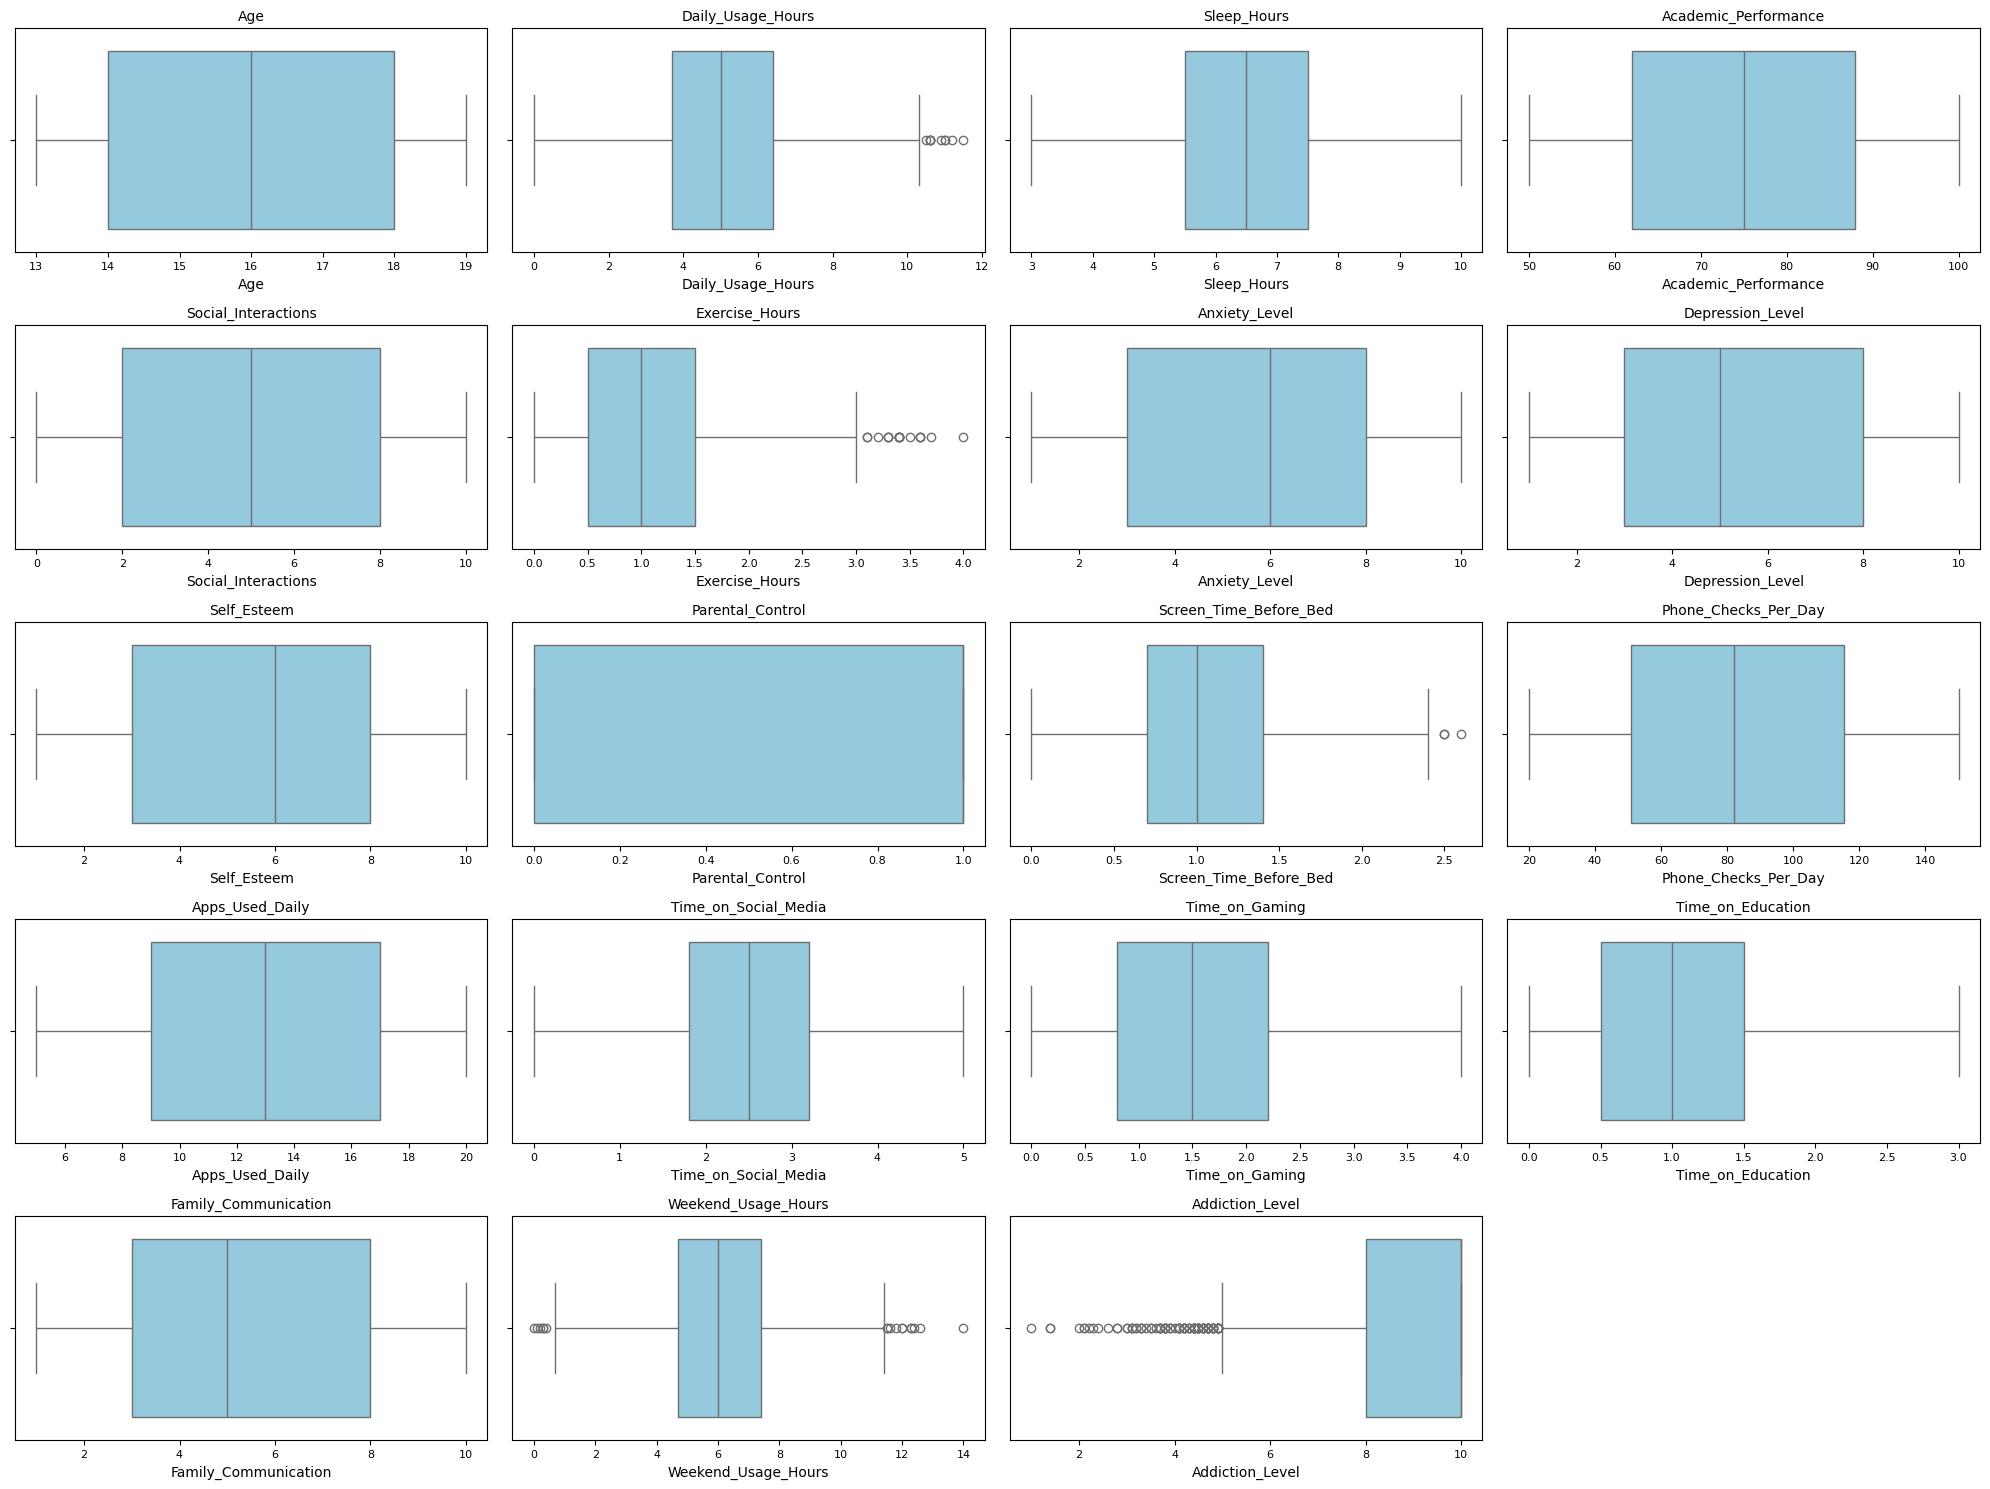

In [466]:
# Boxplots
numeric_columns = [
    'Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 
    'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level',
    'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 
    'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 
    'Time_on_Gaming', 'Time_on_Education', 'Family_Communication', 
    'Weekend_Usage_Hours', 'Addiction_Level'
]

# Set up the subplot grid (5 rows x 4 columns)
fig, axes = plt.subplots(5, 4, figsize=(20, 15))
axes = axes.flatten()  # Flatten to easily iterate

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(labelsize=8)

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

This code plots boxplots for all numerical columns:

- Each boxplot shows the median, quartiles, and outliers for a column.

- Subplots are arranged in a 5×4 grid for easy visualization.

Insight:

- Detects outliers and extreme values.

- Shows spread and skewness of each feature.

- Helps identify columns that may need scaling or transformation before modeling.

In [519]:
# "Binning” or “Discretization"
bins = [0, 3, 7, 10]
labels = ['Low', 'Medium', 'High']
df_final['target'] = pd.cut(df_final['Addiction_Level'],
                            bins=bins,
                            labels=labels,
                            include_lowest=True)

df_final['target'] = df_final['target'].astype('category')

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[labels])  # preserve order
df_final['target_encoded'] = encoder.fit_transform(df_final[['target']])

# Now target_encoded is numeric and ordered
print(df_final[['Addiction_Level', 'target', 'target_encoded']])

      Addiction_Level  target  target_encoded
0                10.0    High             2.0
1                10.0    High             2.0
2                 9.2    High             2.0
3                 9.8    High             2.0
4                 8.6    High             2.0
...               ...     ...             ...
2995              9.8    High             2.0
2996              5.5  Medium             1.0
2997              6.2  Medium             1.0
2998             10.0    High             2.0
2999              6.3  Medium             1.0

[3000 rows x 3 columns]


This code bins the numeric Addiction_Level into categories (Low, Medium, High) and then ordinally encodes them:

- pd.cut() → Creates the categorical target column.

- OrdinalEncoder → Converts Low→0, Medium→1, High→2.

Insight:

- Converts continuous scores into ordered categories for classification.

- Preserves natural order so models can interpret Low < Medium < High.

In [472]:
# Drop ID, Name, and target
X = df_final.drop(['Addiction_Level', 'target', 'target_encoded'], axis=1)

# Target variable
y = df_final['target_encoded']

This code prepares the features (X) and target (y) for modeling:

- X → All columns except Addiction_Level, target, and target_encoded (these are the original and processed target columns).

- y → The encoded target variable (0=Low, 1=Medium, 2=High).

Insight:

- Separates inputs (features) from output (target), which is required before training a machine learning model.

# Training-testing model

In [476]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code splits the dataset into training and testing sets:

- train_test_split() divides X (features) and y (target) into:

    - X_train, y_train → used to train the model

    - X_test, y_test → used to evaluate the model

- test_size=0.2 → 20% of data is for testing, 80% for training.

- random_state=42 → Ensures the split is reproducible.

Insight:

- Separating train and test sets prevents data leakage.

- Allows evaluation of how well the model generalizes to unseen data.

In [496]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train.value_counts())

After SMOTE: target_encoded
2.0    2043
1.0    2043
0.0    2043
Name: count, dtype: int64


This code applies SMOTE (Synthetic Minority Over-sampling Technique) to balance class distribution in the training set:
- SMOTE generates synthetic samples for minority classes.
    - Apply SMOTE on training data
- Balances all classes in y_train by creating synthetic samples for minority classes.

Insight:

- Helps prevent model bias toward majority classes.

- Ensures all classes are equally represented during training, improving performance on minority classes.

In [499]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# ---- Predictions and evaluation ----
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))

Accuracy: 0.9283333333333333
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.84      0.62      0.72        87
         2.0       0.94      0.98      0.96       511

    accuracy                           0.93       600
   macro avg       0.59      0.54      0.56       600
weighted avg       0.92      0.93      0.92       600



This code evaluates the Random Forest model:

- y_pred = model.predict(X_test) → Predicts on test data.

- accuracy_score → Shows overall correctness/Measures the overall proportion of correct predictions.

- classification_report → Shows precision, recall, F1-score for each class.

- Provides detailed metrics for each class:
  
- Precision → Correct positive predictions / Total predicted positives

- Recall → Correct sample predictions / Total actual positives(sample)

- F1-score → Harmonic mean of precision and recall

- Support → Number of samples per class

Insight:

- Accuracy gives a general idea of model performance.

- The classification report shows how well the model predicts each class, useful for imbalanced datasets.

- Measures overall performance and per-class effectiveness, especially useful for imbalanced targets.

💡 Example:
High precision and recall for High addiction class means the model is good at identifying highly addicted teens.

In [502]:
# ---- Train model ----
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

This code trains a Random Forest classifier on your training data:

- RandomForestClassifier(random_state=42) → Initializes the model with a fixed random seed for reproducibility.

- model.fit(X_train, y_train) → Learns patterns from the features (X_train) and target (y_train).

Insight:

- The model is now ready to make predictions on unseen data.

- Random Forest handles non-linear relationships and is robust to overfitting for many features.

In [505]:
pred_data = model.predict(X_test)

This code makes predictions on the test set using the trained model:
- model.predict(X_test) → Uses the Random Forest model to predict the target class for each sample in X_test.

- pred_data → Stores the predicted labels.

Insight:

- These predictions can now be compared with the true labels (y_test) to evaluate model performance.

In [508]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_data)

0.9283333333333333

This code calculates the accuracy of your model on the test set:
- Compares the true labels (y_test) with the predicted labels (pred_data).

- Returns a value between 0 and 1 representing the proportion of correct predictions.

Insight:

- Provides a quick measure of overall model performance.

- Higher accuracy → Model predictions closely match the true target values.

In [511]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Balanced Accuracy: 0.5350113592910003
Confusion Matrix:
 [[  0   2   0]
 [  1  54  32]
 [  0   8 503]]


Balanced Accuracy: 
- Computes the average recall per class.

- Useful for imbalanced datasets where standard accuracy can be misleading.

Confusion Matrix: 
- Shows true vs predicted labels in a matrix form:

- Each cell shows the number of samples for that actual-predicted combination.

Insight:

- Balanced accuracy ensures fair evaluation across all classes.

- Confusion matrix helps identify which classes are misclassified most often.

💡 Example:
If many High cases are predicted as Medium, the model struggles with high addiction levels.

In [514]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   2   0]
 [  1  54  32]
 [  0   8 503]]


This code computes and prints the confusion matrix for your model:
- confusion_matrix compares the true labels (y_test) with predicted labels (y_pred).

- Returns a matrix showing correct and incorrect predictions for each class.

Insight:

- Diagonal values → Correct predictions.

- Off-diagonal values → Misclassifications.

- Helps identify which classes the model confuses the most.

           Predicted
           Low Medium High
True Low      0    2   0
True Medium   0    54   32
True High     0    8   503

Low class: 0 correct, 2 predicted as Medium.

Medium class: 54 correct, 32 predicted as High.

High class: 503 correct, 8 predicted as Medium.